<a href="https://colab.research.google.com/github/dayaniravi123/Machine-Learning-Projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
#path = '/content/drive/MyDrive/Image classification/data.zip'
#!unzip "/content/drive/MyDrive/Image classification/data.zip" -d "/content/drive/MyDrive/Image classification/"

In [6]:
#path = '/content/drive/MyDrive/Image classification/fruits-360_dataset/fruits-360/Training'
path = '/content/drive/MyDrive/Image classification/fruits-360-original-size/fruits-360-original-size/Training'
path

'/content/drive/MyDrive/Image classification/fruits-360-original-size/fruits-360-original-size/Training'

In [3]:

datadir = pathlib.Path(path)

In [4]:
batch_size = 32
img_height = 28
img_width = 28

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6231 files belonging to 24 classes.
Using 4985 files for training.


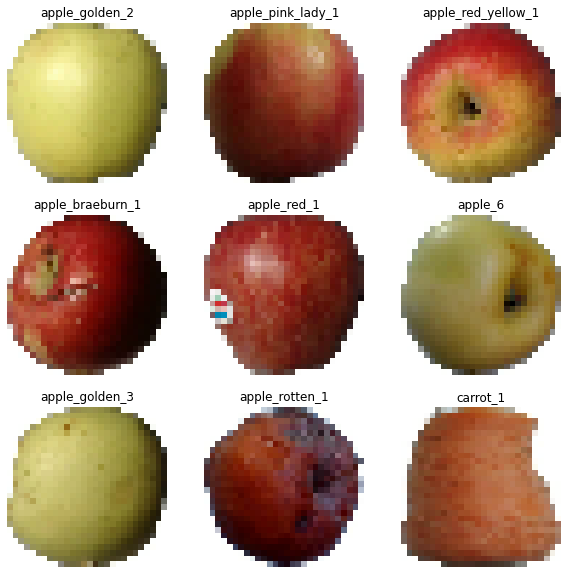

In [12]:
plt.figure(figsize=(10, 10))
for images, classes in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_label[classes[i]])
    plt.axis("off")


In [9]:
class_label = train_ds.class_names


In [13]:
path = '/content/drive/MyDrive/Image classification/fruits-360-original-size/fruits-360-original-size/Validation'
datadir = pathlib.Path(path)

In [14]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  datadir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3114 files belonging to 24 classes.
Using 622 files for validation.


In [15]:
from tensorflow.keras.models import Sequential

num_classes = len(class_label)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  validation_steps = 10
)

Epoch 1/2
 15/156 [=>............................] - ETA: 15:57 - loss: 3.0507 - accuracy: 0.1167

In [ ]:
history.history

{'accuracy': [0.8622047305107117, 1.0],
 'loss': [0.3350942134857178, 1.922735827974975e-05],
 'val_accuracy': [1.0, 1.0],
 'val_loss': [9.478194988332689e-05, 0.0]}